## Import packages

In [1]:
library(class)
library(purrr)

## Import traffic data
The scenario is to predict the traffic signs "pedestrian", "speed", "stops"

In [2]:
data = read.csv("data/knn_traffic_signs.csv")
head(data)
str(data)

id,sample,sign_type,r1,g1,b1,r2,g2,b2,r3,...,b13,r14,g14,b14,r15,g15,b15,r16,g16,b16
1,train,pedestrian,155,228,251,135,188,101,156,...,244,172,228,235,177,235,244,22,52,53
2,train,pedestrian,142,217,242,166,204,44,142,...,237,182,228,143,171,228,196,164,227,237
3,train,pedestrian,57,54,50,187,201,68,51,...,59,76,84,22,82,93,17,58,60,60
4,train,pedestrian,22,35,41,171,178,26,19,...,34,64,61,4,211,222,78,19,27,29
5,train,pedestrian,169,179,170,231,254,27,97,...,91,188,205,78,125,147,20,160,183,187
6,train,pedestrian,75,67,60,131,89,53,214,...,26,197,114,21,123,74,22,180,107,26


'data.frame':	206 obs. of  51 variables:
 $ id       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ sample   : Factor w/ 3 levels "example","test",..: 3 3 3 3 3 3 3 2 3 3 ...
 $ sign_type: Factor w/ 3 levels "pedestrian","speed",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ r1       : int  155 142 57 22 169 75 136 118 149 13 ...
 $ g1       : int  228 217 54 35 179 67 149 105 225 34 ...
 $ b1       : int  251 242 50 41 170 60 157 69 241 28 ...
 $ r2       : int  135 166 187 171 231 131 200 244 34 5 ...
 $ g2       : int  188 204 201 178 254 89 203 245 45 21 ...
 $ b2       : int  101 44 68 26 27 53 107 67 1 11 ...
 $ r3       : int  156 142 51 19 97 214 150 132 155 123 ...
 $ g3       : int  227 217 51 27 107 144 167 123 226 154 ...
 $ b3       : int  245 242 45 29 99 75 134 12 238 140 ...
 $ r4       : int  145 147 59 19 123 156 171 138 147 21 ...
 $ g4       : int  211 219 62 27 147 169 218 123 222 46 ...
 $ b4       : int  228 242 65 29 152 190 252 85 242 41 ...
 $ r5       : int  166 164 156 42 221 67 171 25

## Normalize all numeric columns
To reduce influence of extreme values

In [3]:
# Numeric Columns to be normalized
columns = colnames(data)[-c(1:3)]
columns

[1] "r1"  "g1"  "b1"  "r2"  "g2"  "b2"  "r3"  "g3"  "b3"  "r4"  "g4"  "b4" 
[13] "r5"  "g5"  "b5"  "r6"  "g6"  "b6"  "r7"  "g7"  "b7"  "r8"  "g8"  "b8" 
[25] "r9"  "g9"  "b9"  "r10" "g10" "b10" "r11" "g11" "b11" "r12" "g12" "b12"
[37] "r13" "g13" "b13" "r14" "g14" "b14" "r15" "g15" "b15" "r16" "g16" "b16"

In [4]:
# Min-max normalization
normalize = function(x){
    return((x-min(x)) / (max(x) - min(x)))
}

normalized_data = data.frame(data)

for(col in columns){
    normalized_data[col] = normalize(data[col])
}

head(normalized_data)

id,sample,sign_type,r1,g1,b1,r2,g2,b2,r3,...,b13,r14,g14,b14,r15,g15,b15,r16,g16,b16
1,train,pedestrian,0.6129032,0.89256198,1.0000000,0.5296443,0.7283951,0.4279661,0.588983051,...,0.968,0.6625000,0.8925620,0.962809917,0.6752137,0.9176955,1.00000000,0.07936508,0.14345992,0.21161826
2,train,pedestrian,0.5604839,0.84710744,0.9623431,0.6521739,0.7942387,0.1864407,0.529661017,...,0.940,0.7041667,0.8925620,0.582644628,0.6495726,0.8888889,0.80165289,0.64285714,0.88185654,0.97510373
3,train,pedestrian,0.2177419,0.17355372,0.1589958,0.7351779,0.7818930,0.2881356,0.144067797,...,0.228,0.2625000,0.2975207,0.082644628,0.2692308,0.3333333,0.06198347,0.22222222,0.17721519,0.24066390
4,train,pedestrian,0.0766129,0.09504132,0.1213389,0.6719368,0.6872428,0.1101695,0.008474576,...,0.128,0.2125000,0.2024793,0.008264463,0.8205128,0.8641975,0.31404959,0.06746032,0.03797468,0.11203320
5,train,pedestrian,0.6693548,0.69008264,0.6610879,0.9090909,1.0000000,0.1144068,0.338983051,...,0.356,0.7291667,0.7975207,0.314049587,0.4529915,0.5555556,0.07438017,0.62698413,0.69620253,0.76763485
6,train,pedestrian,0.2903226,0.22727273,0.2008368,0.5138340,0.3209877,0.2245763,0.834745763,...,0.096,0.7666667,0.4214876,0.078512397,0.4444444,0.2551440,0.08264463,0.70634921,0.37552743,0.09958506


## Separate original dataset to training & testing
Exclude the columns "id" and "sample".

In [5]:
signs = subset(normalized_data, sample == "train")[-c(1,2)]
head(signs)
cat("Number of rows: ",nrow(signs))

sign_type,r1,g1,b1,r2,g2,b2,r3,g3,b3,...,b13,r14,g14,b14,r15,g15,b15,r16,g16,b16
pedestrian,0.6129032,0.89256198,1.0000000,0.5296443,0.7283951,0.4279661,0.588983051,0.88571429,1.00000000,...,0.968,0.6625000,0.8925620,0.962809917,0.6752137,0.9176955,1.00000000,0.07936508,0.14345992,0.21161826
pedestrian,0.5604839,0.84710744,0.9623431,0.6521739,0.7942387,0.1864407,0.529661017,0.84489796,0.98723404,...,0.940,0.7041667,0.8925620,0.582644628,0.6495726,0.8888889,0.80165289,0.64285714,0.88185654,0.97510373
pedestrian,0.2177419,0.17355372,0.1589958,0.7351779,0.7818930,0.2881356,0.144067797,0.16734694,0.14893617,...,0.228,0.2625000,0.2975207,0.082644628,0.2692308,0.3333333,0.06198347,0.22222222,0.17721519,0.24066390
pedestrian,0.0766129,0.09504132,0.1213389,0.6719368,0.6872428,0.1101695,0.008474576,0.06938776,0.08085106,...,0.128,0.2125000,0.2024793,0.008264463,0.8205128,0.8641975,0.31404959,0.06746032,0.03797468,0.11203320
pedestrian,0.6693548,0.69008264,0.6610879,0.9090909,1.0000000,0.1144068,0.338983051,0.39591837,0.37872340,...,0.356,0.7291667,0.7975207,0.314049587,0.4529915,0.5555556,0.07438017,0.62698413,0.69620253,0.76763485
pedestrian,0.2903226,0.22727273,0.2008368,0.5138340,0.3209877,0.2245763,0.834745763,0.54693878,0.27659574,...,0.096,0.7666667,0.4214876,0.078512397,0.4444444,0.2551440,0.08264463,0.70634921,0.37552743,0.09958506


Number of rows:  146

In [6]:
signs_test = subset(normalized_data, sample == "test")[-c(1,2)]
head(signs_test)
cat("Number of rows: ",nrow(signs_test))

,sign_type,r1,g1,b1,r2,g2,b2,r3,g3,b3,...,b13,r14,g14,b14,r15,g15,b15,r16,g16,b16
8,pedestrian,0.4637097,0.3842975,0.2384937,0.9604743,0.9629630,0.2838983,0.4872881,0.4612245,0.008510638,...,0.292,0.49166667,0.46280992,0.01239669,0.37179487,0.33744856,0.21074380,0.39285714,0.30801688,0.23651452
13,pedestrian,0.8790323,0.9586777,0.9414226,0.2015810,0.1399177,0.1101695,0.7966102,0.9102041,0.931914894,...,0.044,0.25416667,0.16115702,0.04545455,0.06410256,0.07407407,0.06611570,0.19047619,0.08438819,0.04979253
14,pedestrian,0.1653226,0.1570248,0.1297071,0.3833992,0.2386831,0.1059322,0.6483051,0.7020408,0.689361702,...,0.072,0.33750000,0.21900826,0.07438017,0.33333333,0.22633745,0.07851240,0.18650794,0.08438819,0.07053942
19,pedestrian,0.3024194,0.3884298,0.3765690,0.3833992,0.4691358,0.3474576,0.2033898,0.3306122,0.276595745,...,0.300,0.32500000,0.39669421,0.40495868,0.12820513,0.20576132,0.22727273,0.17063492,0.16877637,0.20746888
20,pedestrian,0.6451613,0.6983471,0.6694561,0.2055336,0.1646091,0.1525424,0.6483051,0.6979592,0.685106383,...,0.228,0.16666667,0.16115702,0.14049587,0.20512821,0.25925926,0.26859504,0.28571429,0.26582278,0.28215768
22,pedestrian,0.4596774,0.5165289,0.5020921,0.4545455,0.3868313,0.2838983,0.1737288,0.1755102,0.072340426,...,0.080,0.02083333,0.05785124,0.08264463,0.00000000,0.06584362,0.09917355,0.06746032,0.04219409,0.09958506


Number of rows:  59

## Perform k-NN learning
Try k=1, 7, 15

In [7]:
knn_training = function(k){
    # Get prediction from knn model
    # Use [-1] to exclude categorial column "sign_type"
    pred <- knn(train = signs[-1], test = signs_test[-1], cl = signs$sign_type, k=k)
    actual = signs_test$sign_type
    
    print(paste("k = ", k))
    print("Confusion matrix:")
    print(table(pred, actual))
    print(paste("Accurary: ", mean(pred == actual)))
}

In [8]:
knn_training(1)

[1] "k =  1"
[1] "Confusion matrix:"
            actual
pred         pedestrian speed stop
  pedestrian         19     2    0
  speed               0    17    0
  stop                0     2   19
[1] "Accurary:  0.932203389830508"


In [9]:
knn_training(7)

[1] "k =  7"
[1] "Confusion matrix:"
            actual
pred         pedestrian speed stop
  pedestrian         16     0    0
  speed               1    20    0
  stop                2     1   19
[1] "Accurary:  0.932203389830508"


In [10]:
knn_training(15)

[1] "k =  15"
[1] "Confusion matrix:"
            actual
pred         pedestrian speed stop
  pedestrian         14     0    0
  speed               1    20    0
  stop                4     1   19
[1] "Accurary:  0.898305084745763"


## Plot accuracy for different k (from 1 to 100)

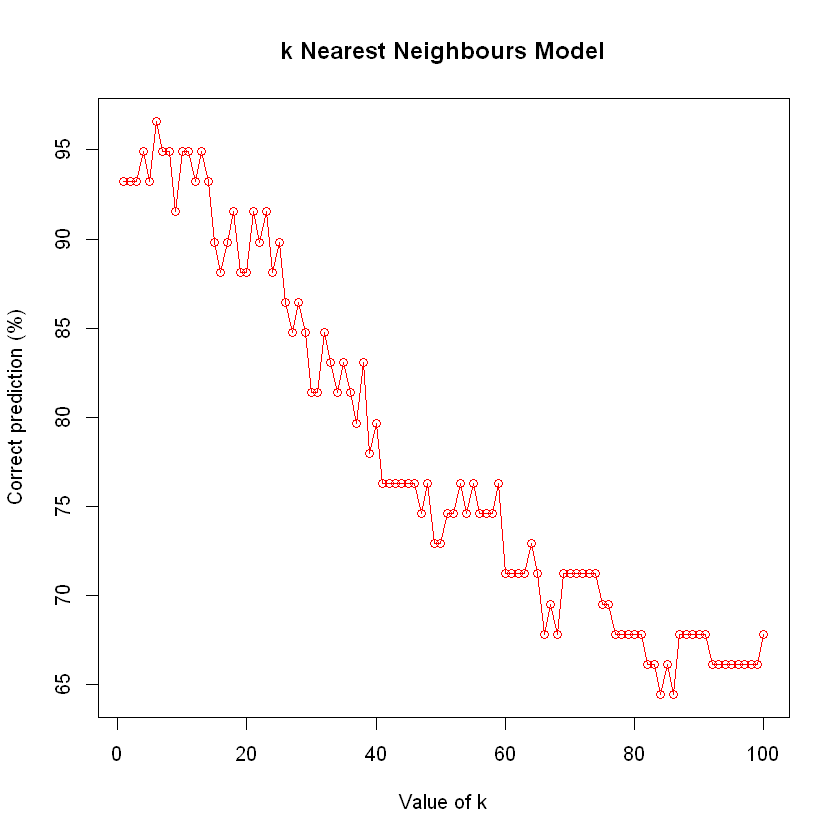

In [11]:
get_accuracy = function(k){
    pred <- knn(train = signs[-1], test = signs_test[-1], cl = signs$sign_type, k=k)
    actual = signs_test$sign_type
    return(mean(pred == actual))
}

x = 1:100
y = map_dbl(x, get_accuracy) * 100
plot(x, y,type = "o", col = "red", xlab = "Value of k", ylab = "Correct prediction (%)", main = "k Nearest Neighbours Model")